# Lecture 2
Exercises for the exam: Q3 and Q6

Extra: Q1, Q2 and Q4

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [1]:
import numpy as np
import time

In [7]:
# Numpy?? Never heard about it 

def my_std(a):
    """Compute the standard deviation as you leanerd at the primary school"""
    avg = 0.
    for e in a:
        avg += e
    avg = avg / len(a)

    sum = 0.
    for e in a:
        sum += (e-avg)**2
    avg = sum / len(a)

    return avg ** 0.5

In [8]:
a = np.linspace(0, 10, 10**6)

In [9]:
t0 = time.time()
for i in range(10):
    A = my_std(a)
t1 = time.time()
print("time elapsed: {:.5f} s".format(t1-t0))

time elapsed: 1.67649 s


In [10]:
t0 = time.time()
for i in range(10):
    B = np.std(a)
t1 = time.time()
print("time elapsed: {:.5f} s".format(t1-t0))

print("\nNumerical difference between the two methods", A-B)

time elapsed: 0.03260 s

Numerical difference between the two methods -1.199040866595169e-14


# Q6: Game of Life

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [28]:
def evolve(parent):
    """ Take a matrix of only 0 or 1 and evolve it according to the Game of Life rules"""
    
    son = np.zeros((len(parent), len(parent[0])))
    
    for i in [-1, 0, 1]:
        #roll X
        tx = np.roll(parent, i)
        for j in [-1, 0, 1]:
            #roll y
            if(i!=0 or j!=0):
                ty = np.roll(tx, j, 0)
                son += ty
    
    live_2neigh = parent*10+son # A cell is = 12 only if it was live and has 2 neighbors
    live_2neigh[live_2neigh!=12] = 0 # Kill the others
    live_2neigh[live_2neigh==12] = 1
    
    son[son!=3] = 0 # Kill whatever has a number of neighbors != 3
    son[son==3] = 1
    
    parent = son + live_2neigh # A parent son of its son: a working paradox
    
    plt.imshow(parent, cmap='hot', interpolation='nearest')
    plt.show()
    return parent

In [29]:
x_cells = 20
y_cells = 20

a = np.random.randint(2, size=x_cells*y_cells).reshape(x_cells, y_cells)
a

array([[1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 0,

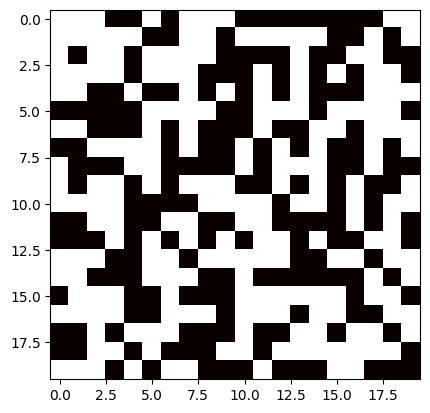

In [30]:
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

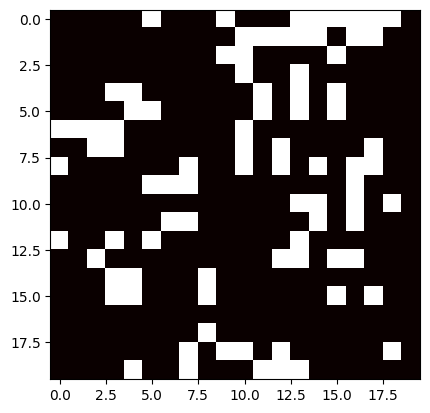

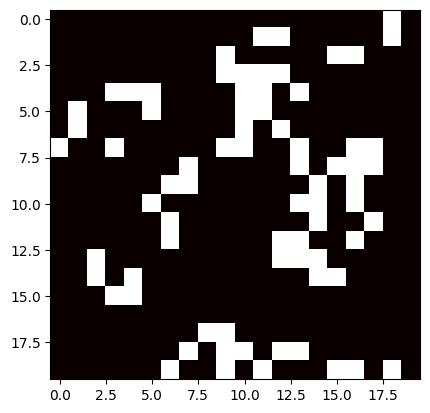

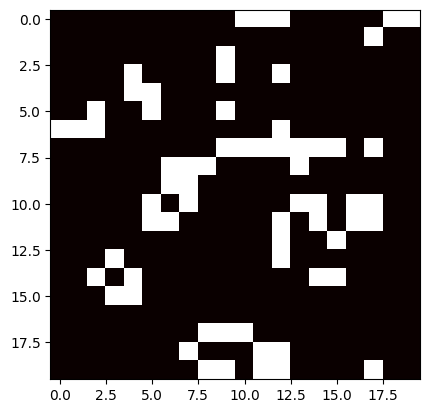

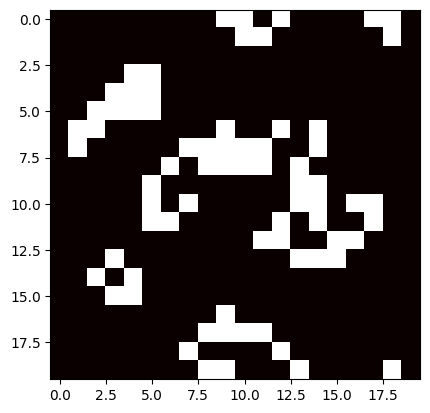

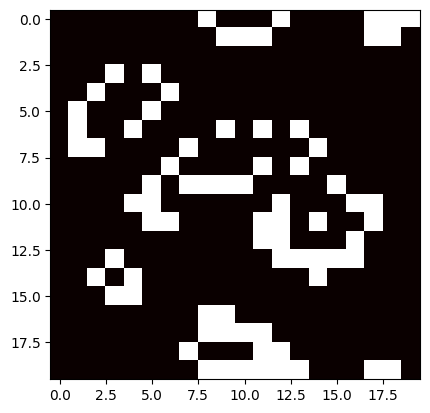

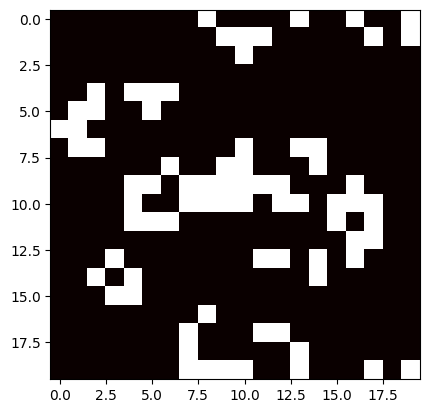

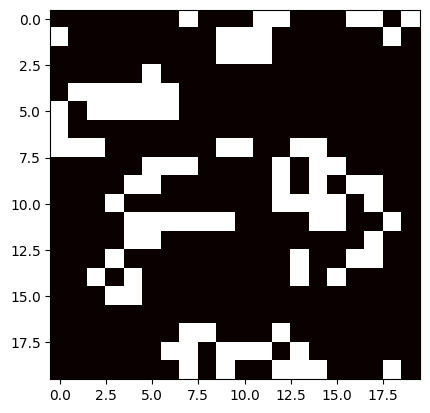

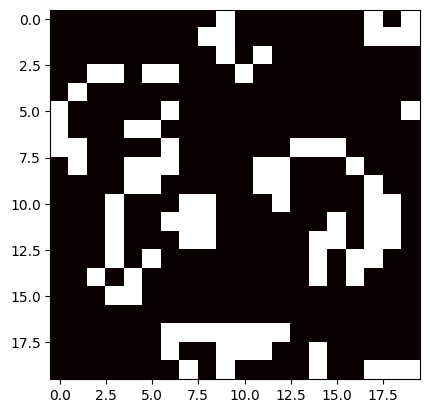

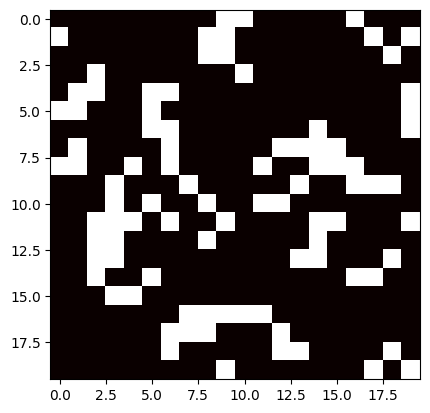

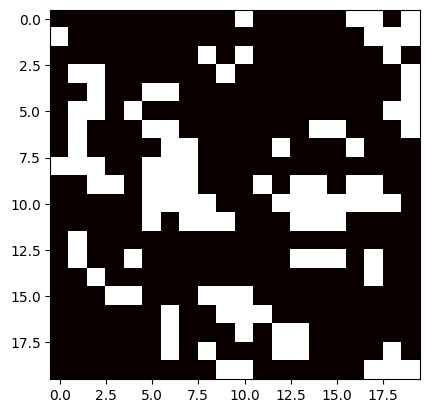

In [31]:
for i in range(10):
    a = evolve(a)

# Extra

## L2-Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.

In [16]:
import numpy as np

In [17]:
# A
d = np.arange(15).reshape(3,5).T + 1
print(d)
d = np.arange(1,16).reshape(3,5).T
print("\n\n...or... \n\n", d, "\n \n")

t = d[[1,3]]
print(t)

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


...or... 

 [[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]] 
 

[[ 2  7 12]
 [ 4  9 14]]


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

In [18]:
def build_frame (rows, columns):
    t = np.ones((rows,columns), dtype=int)
    t[1:rows-1,1:columns-1] = 0
    print(t)

In [19]:
build_frame(6,7)

[[1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1]]


## L2-Q2: Histrograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook. You download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt (and use python to download a file!)

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

In [20]:
import numpy as np
import requests

In [21]:
file_link = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt"
response = requests.get(file_link)
local_file = "sample.txt"

In [22]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open(local_file, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully to {local_file}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

t = np.loadtxt(local_file)

h = np.histogram(t[:,1:2])

for count, bin  in zip(h[0], range(len(h[1]))):
    print("Bin=", "{:.2f}".format(h[1][bin]+h[1][bin+1]/2.) , "has", count, "counts")

File downloaded successfully to sample.txt
Bin= -42.42 has 3 counts
Bin= -32.05 has 4 counts
Bin= -21.67 has 9 counts
Bin= -11.29 has 22 counts
Bin= -0.91 has 22 counts
Bin= 9.46 has 22 counts
Bin= 19.84 has 9 counts
Bin= 30.22 has 7 counts
Bin= 40.60 has 1 counts
Bin= 50.97 has 1 counts


## L2-Q4: Bootstraps

Boostrapping is a prominent statistical tecnique to estimate errors when you're stuck and don't know what else to o: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 

In [23]:
import numpy as np
import random

In [24]:
pop = np.random.normal(0., 1., 10**6) + np.random.uniform(-3., 3., 10**6)

In [25]:
a = 10**5
v2 = pop.reshape(a, int(len(pop)/a))

In [26]:
v3 = np.empty(0)
for i in v2:
    v3 = np.append(v3, np.mean(i))

In [27]:
mean = np.mean(v3)
x = v3[np.argsort(v3)]
ci_up  = x[int(len(v3)*0.95)]
ci_low = x[int(len(v3)*0.05)]
print(f"Mean : {mean:.4f}")
print(f"C.L. : [{ci_low:.4f}; {ci_up:.4f}]")

Mean : -0.0011
C.L. : [-1.0437; 1.0424]
